## SQL Project

**Description of the project:** The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.
You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

**Goal of the project:** The goal of this project is to study the data owned by a book app on books, publishers, authors, and customer ratings and reviews. More precisely, it is to answer the following set of questions that will then be useful to generate a value proposition for a new product:

- What is the number of books released after January 1, 2000?
- What is the number of user reviews and the average rating for each book?
- Who is the publisher that has released the greatest number of books with more than 50 pages? Limiting the number of pages will help us exclude brochures and similar publications from your analysis.
- Who is the author with the highest average book rating among books with at least 50 ratings?
- What is the average number of text reviews among users who rated more than 50 books?

### Table of Contents (Decomposition)

* [Step 1](#step1) General overview of data  
    * [Step 1.1](#step1_1) Description of the data
    * [Step 1.2](#step1_2) Data diagram
    * [Step 1.3](#step1_3) Connecting to the database
    * [Step 1.4](#step1_4) Studying the tables
* [Step 2](#step2) Making SQL queries for the tasks
    * [Step 2.1](#step2_1) Finding the number of books released after January 1, 2000.
    * [Step 2.2](#step2_2) Finding the number of user reviews and the average rating for each book.
    * [Step 2.3](#step2_3) Identifying the publisher that has released the greatest number of books with more than 50 pages
    * [Step 2.4](#step2_4) Identifying the author with the highest average book rating: look only at books with at least 50 ratings
    * [Step 2.5](#step2_5) Finding the average number of text reviews among users who rated more than 50 books
* [Step 3](#step3) Final conclusions

<span style="color:blue">**Importing libraries:**</span> 

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns


<a class="anchor" id="step1"></a> 
### Step 1 General overview of data

<a class="anchor" id="step1_1"></a> 
#### Step 1-1 Description of the data

We have been provided with the following description for the database tables.

- **books:** Contains data on books:
    -`book_id`
    - `author_id`
    - `title`
    - `num_pages` — number of pages
    - `publication_date`
    - `publisher_id`
    

- **authors:** Contains data on authors:
    - `author_id`
    - `author`
    

- **publishers:** Contains data on publishers:
    - `publisher_id`
    - `publisher`
    

- **ratings:** Contains data on user ratings:
    - `rating_id`
    - `book_id`
    - `username` — the name of the user who rated the book
    - `rating`
    

- **reviews:** Contains data on customer reviews:
    - `review_id`
    - `book_id`
    - `username` — the name of the user who reviewed the book 
    - `text` — the text of the review

<a class="anchor" id="step1_2"></a> 
#### Step 1-2 Data diagram

We have also been given the following data diagram showing the relationships between the database tables.

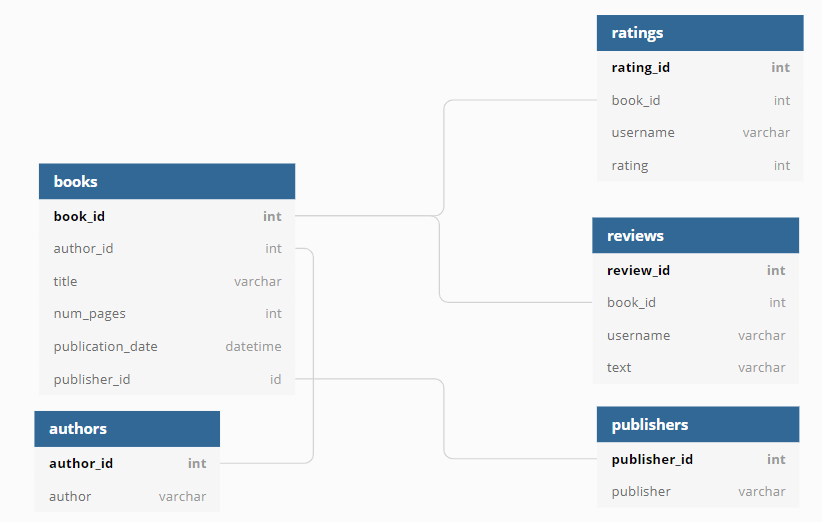

<a class="anchor" id="step1_3"></a> 
#### Step 1-3 Connecting to the database

Let us create a connection to the database engine. For the connection to work, we downloaded the file https://storage.yandexcloud.net/cloud-certs/CA.pem to the folder containing this notebook's .ipynb file.

In [2]:
db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


Now, we can write sql queries, and use the engine to get the outputs to our queries.

<a class="anchor" id="step1_4"></a> 
#### Step 1.4 Studying the tables

In this part, we query all the columns of the database tables and print the information and first few rows of the returned dataframes.

In [3]:
# Querying the books table and printing information and head of returned books dataframe
query = "select * from books"
books_df = pd.io.sql.read_sql(query, con = engine)
books_df.info()
display(books_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
# Querying the authors table and printing information and head of returned authors dataframe
query = "select * from authors"
authors_df = pd.io.sql.read_sql(query, con = engine)
authors_df.info()
display(authors_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
# Querying the ratings table and printing information and head of returned ratings dataframe
query = "select * from ratings"
ratings_df = pd.io.sql.read_sql(query, con = engine)
ratings_df.info()
display(ratings_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
# Querying the reviews table and printing information and head of returned reviews dataframe
query = "select * from reviews"
reviews_df = pd.io.sql.read_sql(query, con = engine)
reviews_df.info()
display(reviews_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [7]:
# Querying the publishers table and printing information and head of returned publishers dataframe
query = "select * from publishers"
publishers_df = pd.io.sql.read_sql(query, con = engine)
publishers_df.info()
display(publishers_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<a class="anchor" id="step2"></a> 
### Step 2 Making SQL queries for the tasks

In this step, we find the answers to the questions posed as part of the goals of this project. Each sub-step consists of code cells for the defining the sql query, querying the output via the connection we created, and displaying the output answering the questions. When appropriate, we also ploted the outplu of the sql query using python libraries. We have also added the corresponding code cell solving the same problem via python. This was done as a sanity check and we commented the cell after verifying the result of the sql query and python analysis matches. Finally, we interpret the finding.

<a class="anchor" id="step2_1"></a> 
#### Step 2-1 Finding the number of books released after January 1, 2000

In [8]:
# SQL query
query = """
        SELECT 
            COUNT(DISTINCT book_id) AS num_books_after_2000 
        FROM 
            books 
        WHERE 
            publication_date >= '2000-01-01';
        """

# output of SQL query
books_count = pd.io.sql.read_sql(query, con = engine)
print('There are {} books released after January 1, 2000'.format(books_count.loc[0, 'num_books_after_2000']))


There are 821 books released after January 1, 2000


In [9]:
# Sanity check with Python
# books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], 
#                                              format='%Y-%m-%d', errors='coerce')
# print('Result obtained via Pandas dataframe:', 
#       books_df.loc[books_df['publication_date'] >= '2000-01-01', 'book_id'].nunique())


**Interpretation of query output:** We found that there were 821 books released after 2000. 

<a class="anchor" id="step2_2"></a> 
#### Finding the number of user reviews and the average rating for each book

In [10]:
# SQL query
query = """
        SELECT 
            book_id, 
            COUNT(review_id) AS review_counts 
        FROM 
            reviews 
        GROUP BY 
            book_id
        ORDER BY 
            review_counts DESC;
        """

# output of SQL query
review_count = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
print('Table showing the number of user reviews for each group:')
display(review_count)


Table showing the number of user reviews for each group:


,book_id,review_counts
0,948,7
1,656,6
2,497,6
3,963,6
4,696,6
...,...,...
989,599,1
990,187,1
991,156,1
992,984,1


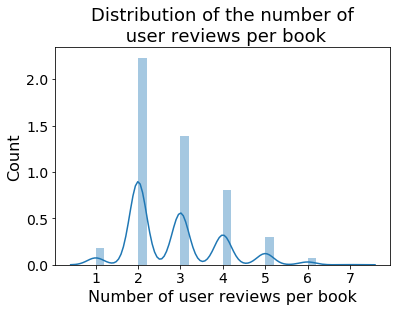

In [11]:
# Generate distribution plot using seaborn displot
sns.distplot(review_count['review_counts'])

plt.title('Distribution of the number of\n user reviews per book', fontsize=18)
plt.xlabel('Number of user reviews per book', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


In [12]:
# Sanity check with Python
# a = review_count.set_index('book_id').sort_index()
# b = reviews_df.groupby('book_id')['review_id'].count().to_frame()
# print('Is the result obtained via Pandas dataframe same:', a['review_counts'].equals(b['review_id']))


In [13]:
# SQL query
query = """
        SELECT 
            book_id, 
            AVG(rating) AS avg_rating 
        FROM 
            ratings 
        GROUP BY 
            book_id;
        """

# output of SQL query
avg_ratings = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(avg_ratings.sort_values('book_id'))


,book_id,avg_rating
853,1,3.666667
78,2,2.500000
171,3,4.666667
533,4,4.500000
303,5,4.000000
...,...,...
606,996,3.666667
920,997,3.400000
760,998,3.200000
764,999,4.500000


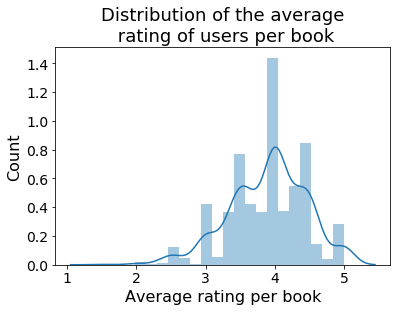

In [14]:
# Generate distribution plot using seaborn displot
sns.distplot(avg_ratings['avg_rating'])

plt.title('Distribution of the average\n rating of users per book', fontsize=18)
plt.xlabel('Average rating per book', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


In [15]:
# Sanity check with Python
# a = avg_ratings.set_index('book_id').sort_index()
# b = ratings_df.groupby('book_id')['rating'].mean().to_frame()
# print('Is the result obtained via Pandas dataframe same:', sum(round(a['avg_rating'], 6)-round(b['rating'],6)))


We found the number of reviews and the average user rating for each book via two sql queries. Let us also write a query which outputs the answers jointly and also shows the book titles.

In [16]:
query = """
        SELECT
            bo.book_id,
            bo.title AS book_title,
            subquery1.avg_rating AS avg_rating,
            COALESCE(subquery2.review_counts, 0 )
        AS review_counts
        FROM
           books bo 
        LEFT JOIN 
        (SELECT 
            book_id, 
            AVG(rating) AS avg_rating 
        FROM 
            ratings 
        GROUP BY 
            book_id) AS subquery1 ON subquery1.book_id=bo.book_id
        LEFT JOIN 
        (SELECT 
            book_id, 
            COUNT(review_id) AS review_counts 
        FROM 
            reviews 
        GROUP BY 
            book_id) AS subquery2 ON subquery2.book_id=bo.book_id
        ORDER BY 
            review_counts DESC;
        """

# output of SQL query
avg_ratings = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(avg_ratings)


,book_id,book_title,avg_rating,review_counts
0,948,Twilight (Twilight #1),3.662500,7
1,695,The Curious Incident of the Dog in the Night-Time,4.081081,6
2,299,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
3,696,The Da Vinci Code (Robert Langdon #2),3.830508,6
4,734,The Glass Castle,4.206897,6
...,...,...,...,...
995,672,The Cat in the Hat and Other Dr. Seuss Favorites,5.000000,0
996,808,The Natural Way to Draw,3.000000,0
997,221,Essential Tales and Poems,4.000000,0
998,387,Leonardo's Notebooks,4.000000,0


**Interpretation of queries' outputs** We found that each book had between 1 to 7 reviews. But the distribution is concentrated around 2 reviews per book with over 400 such books, and steadily decays to 3, 4, 5 reviews per book with the counts dropping to ca. 300, ca. 200, ca. 100 books, respectively. As for the distribution of the average ratings for each book, we find that there are peaks in the distribution at half or full points 2.5, 3, 3.5, 4, 4.5, and 5. This is probably due to the fact that it is more natural for people to give such ratings. The highest peak occurs around 4 points with slighlty above 200 such rated books. On the other hand, most books rating fall in the interval 3-4.5. 

#### <font color='Purple'>Student's commentary:</font> Thank you for pointing the issue. I didn't remove the previous analysis, but added at the end the query to generate the above table. But I think the dataset's from which you generated the above table is different, since the content does not match. <a class="tocSkip"> 
</div>

#### <font color='Purple'>Student's commentary:</font> 

The error was caused because I was using ISNULL instead of COALESCE. Actually, I had found the latter is used in postgresql and the code was running without error, but somehow I think I have pressed CRTL-Z and submitted the cell with ISNULL, which I had tried first. I corrected that and now my query runs without error.

I also implemented your suggestion below. However, your suggested solution seems to be wrong to me. In fact, if you look at my answer above looking for only the number of reviews separetely (select book_id and count the number of reviews grouped by book_id from the reviews table only), you can see that any book did not get more than 7 reviews. Now, when you do INNER JOIN with books and reviews and ratings, than the reviews and ratings are duplicated somehow, but because average won't be affected the result for the avg ratings is the same, however many more reviews are found. In fact the reviews table has 2793 rows, looking at the screenshot you showed the total number of reviews would exceed the number of total reviews. As I show below, you can also check with a simple SELECT query, book_id=948 corresponds to the book Twilight, that book has only 7 reviews, but in the screenshot you showed it has 1120 reviews. So, unfortunately, I do not see how the logic you suggested could work.
<a class="tocSkip"> 
</div>

In [17]:
# Querying the reviews table and printing information and head of returned reviews dataframe
query = "select count(*) from reviews where book_id=948"
reviews_df = pd.io.sql.read_sql(query, con = engine)
display(reviews_df)


,count
0,7


In [18]:
query = """
        SELECT
            title AS book_title,
            AVG(rating) AS mean_rating,
            COUNT(review_id) AS review_num  
            FROM
                books bo
            INNER JOIN ratings rat ON rat.book_id = bo.book_id
            INNER JOIN reviews rev ON rev.book_id = bo.book_id
                
        GROUP BY
            book_title
            
        ORDER BY
            review_num DESC;
        """
            
      
# output of SQL query
avg_ratings = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(avg_ratings)


,book_title,mean_rating,review_num
0,Twilight (Twilight #1),3.662500,1120
1,The Hobbit or There and Back Again,4.125000,528
2,The Catcher in the Rye,3.825581,516
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634,492
4,Harry Potter and the Chamber of Secrets (Harry...,4.287500,480
...,...,...,...
988,The Adventures of Tom Sawyer and Adventures of...,5.000000,2
989,History of Beauty,2.500000,2
990,Lysistrata,4.000000,2
991,Executive Orders (Jack Ryan #8),3.500000,2


<a class="anchor" id="step2_3"></a> 
#### Identifying the publisher that has released the greatest number of books with more than 50 pages

In [19]:
# Make SQL query
query = """
            SELECT 
                publisher,
                publisher_id
            FROM
                publishers
            WHERE 
                publisher_id IN
                (SELECT 
                     publisher_id
                FROM 
                    books 
                WHERE 
                    num_pages > 50 
                GROUP BY 
                    publisher_id 
                ORDER BY COUNT(DISTINCT book_id)  DESC
                LIMIT 1);
        """

# Get output of SQL query
publisher_most = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(publisher_most)


,publisher,publisher_id
0,Penguin Books,212


We identified the publisher, but let us make another query to also output the number of books the publisher released.

In [20]:
# Make SQL query
query = """
            SELECT  
                pub.publisher_id, pub.publisher, count(bo.book_id) as COUNT_BOOK
            FROM
                publishers pub
            LEFT JOIN books bo ON pub.publisher_id = bo.publisher_id
            WHERE bo.num_pages > 50
            GROUP BY pub.publisher_id
            ORDER BY COUNT_BOOK desc
            LIMIT 10
         """

# Get output of SQL query
publisher_most = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(publisher_most)


,publisher_id,publisher,count_book
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
5,35,Bantam,19
6,45,Berkley,17
7,284,St. Martin's Press,14
8,46,Berkley Books,14
9,83,Delta,13


In [21]:
# Sanity check with Python
# print('Max number of books released:', 
#     books_df.loc[books_df['num_pages'] > 50].groupby('publisher_id')['book_id'].nunique().sort_values().max())

# publishers_df[publishers_df['publisher_id']==212]


**Interpretation of query output:** From the above table, we see that there were 10 publishers which released books with more than 50 pages. The highest number of such books were published with Penguin Books with a count of 42 books. The next publisher had only 31 releases of books with more than 50 pages. 

<a class="anchor" id="step2_4"></a> 
#### Identifying the author with the highest average book rating: look only at books with at least 50 ratings

In [22]:
# Make SQL query
query = """
            SELECT  
                rat.book_id, bo_up.title, bo_up.author_id, bo_up.author, AVG(rat.rating) AS avg_rating
            FROM
                ratings rat
            LEFT JOIN (SELECT bo.book_id, bo.title, au.author_id, au.author
                       FROM books bo 
                       LEFT JOIN authors au ON bo.author_id = au.author_id) bo_up
            ON 
                rat.book_id = bo_up.book_id 
            GROUP BY 
                rat.book_id, bo_up.title, bo_up.author_id, bo_up.author
            HAVING 
                COUNT(rat.book_id) >= 50
            ORDER BY 
                AVG(rat.rating) DESC;
         """


# Get output of SQL query
author_book_max_rating = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(author_book_max_rating)


,book_id,title,author_id,author,avg_rating
0,302,Harry Potter and the Prisoner of Azkaban (Harr...,236,J.K. Rowling/Mary GrandPré,4.414634
1,722,The Fellowship of the Ring (The Lord of the Ri...,240,J.R.R. Tolkien,4.391892
2,299,Harry Potter and the Chamber of Secrets (Harry...,236,J.K. Rowling/Mary GrandPré,4.287500
3,656,The Book Thief,402,Markus Zusak/Cao Xuân Việt Khương,4.264151
4,300,Harry Potter and the Half-Blood Prince (Harry ...,236,J.K. Rowling/Mary GrandPré,4.246575
5,399,Little Women,376,Louisa May Alcott,4.192308
6,301,Harry Potter and the Order of the Phoenix (Har...,236,J.K. Rowling/Mary GrandPré,4.186667
7,750,The Hobbit or There and Back Again,240,J.R.R. Tolkien,4.125000
8,779,The Lightning Thief (Percy Jackson and the Oly...,498,Rick Riordan,4.080645
9,405,Lord of the Flies,621,William Golding,3.901408


The above query looked at the average rating of each book. Let us now query the average of the above ratings per author.

In [23]:
# Make SQL query
query = """
        SELECT
            avg_rating_table.author,
            AVG(avg_rating_table.avg_rating) as avg_books_avg_rating
        FROM
            (SELECT  
                rat.book_id, bo_up.title, bo_up.author_id, bo_up.author, AVG(rat.rating) as avg_rating
            FROM
                ratings rat
            LEFT JOIN (SELECT bo.book_id, bo.title, au.author_id, au.author
                       FROM books bo 
                       LEFT JOIN authors au ON bo.author_id = au.author_id) bo_up
            ON 
                rat.book_id = bo_up.book_id 
            GROUP BY 
                rat.book_id, bo_up.title, bo_up.author_id, bo_up.author
            HAVING 
                COUNT(rat.book_id) >= 50
            ORDER BY 
                AVG(rat.rating) DESC) avg_rating_table
        GROUP BY 
            avg_rating_table.author
        ORDER BY 
            avg_books_avg_rating DESC;
         """
      
# Get output of SQL query
author_book_max_rating = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
display(author_book_max_rating)


,author,avg_books_avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Dan Brown,3.754540


In [24]:
# Sanity check with Python
# ratings_grp = ratings_df.groupby('book_id').agg({'rating_id':'count', 'rating':'mean'})
# ratings_grp = ratings_grp.loc[ratings_grp['rating_id'] > 50]
# ratings_grp = ratings_grp.rename(columns={'rating_id':'rating_counts', 'rating':'avg_rating'})

# j1 = ratings_grp.join(books_df[['book_id', 'author_id']].set_index('book_id')).set_index('author_id')
# j2 = j1.join(authors_df.set_index('author_id')).sort_values('avg_rating', ascending=False)
# display(j2)
# display(j2.groupby('author')['avg_rating'].mean().to_frame().sort_values('avg_rating', ascending=False))


**Interpretation of query output:** We found 19 books, which got rated more than 50 times. Some of these books were written by the same author. Averaging the average ratings further over their authors, we found that J.K. Rowling/Mary GrandPré got the highest average for its Harry Potter series with an average rating of ca. 4.28 points. However, it was followed closely by Markus Zusak/Cao Xuân Việt Khương who received ca. 4.26 points. We can also note that 3 other authors--J.R.R. Tolkien, Louisa May Alcott, Rick Riordan--received an average rating above 4 points.

<a class="anchor" id="step2_5"></a> 
#### Finding the average number of text reviews among users who rated more than 50 books

In [25]:
query = """
          SELECT
              AVG(rev_table.review_counts)
          FROM
                (SELECT  
                    rat.username,
                    COUNT(rat.rating) AS rating_counts
                FROM
                    ratings rat
                GROUP BY rat.username
                ORDER BY rating_counts DESC) rat_table
             INNER JOIN 
            
                (SELECT  
                    rev.username,
                    COUNT(rev.text) AS review_counts
                FROM
                    reviews rev
                GROUP BY rev.username) rev_table
                ON rat_table.username = rev_table.username
         WHERE
             rat_table.rating_counts > 50 ;
         """


# Get output of SQL query
author_book_max_rating = pd.io.sql.read_sql(query, con = engine)

# Display output of SQL query
print('There are on average {:.2f} text reviews among users who rated more than 50 books.'
        .format(author_book_max_rating.iloc[0, 0]))


There are on average 24.33 text reviews among users who rated more than 50 books.


In [26]:
# Sanity check with Python
# r1 = ratings_df.groupby('username')['rating'].count().sort_index().to_frame()
# r2 = reviews_df.groupby('username')['text'].count().sort_index().to_frame()
# r1.info()
# r2.info()
# print(r1.index.equals(r2.index))
# j = r1.join(r2)
# display(j)
# round(j.loc[j['rating'] > 50, 'text'].mean(), 2)


**Interpretation of query output:** Among users who rated more than 50 books, we found that there were on average 24.33 reviews. 

<a class="anchor" id="step3"></a> 
### Step 3 Final Conclusions

In this project, we connected to the database of a books app business and answered a set of question the business will use to develop a value proposition for a new product. In particular, we found the following results through sql queries:
- There were 821 books released after 2000;
- Each book in the app had between 1 to 7 reviews, with slightly over 400 books reviews 2 times and the reviewed number of books with 3, 4, or 5 reviews steadily decaying;
- The books got ratings anywhere from 1.5 to 5. The majority of the ratings fall in the interval 3 to 4.5, though about 50 books received a rating close to 5 points. Slightly above 200 books got around 4 points. The neighborhood of the latter was the dominant rating;
- Among books which received more than 50 ratings, J.K. Rowling/Mary GrandPré got the highest average rating for its Harry Potter series by receiving 4.26 points. There were 4 other authors--Markus Zusak/Cao Xuân Việt Khương, J.R.R. Tolkien, Louisa May Alcott, Rick Riordan--that scored average ratings above 4 points;
- There were on average 24.33 reviews written by users who rated more than 50 books.